In [1]:
import sys
sys.path.append('/Users/WangHao/学习/Pycharm/PhaseNet')
sys.path

['/Users/WangHao/学习/Pycharm/PhaseNet/notebooks',
 '/Users/WangHao/Program/Miniconda/miniconda3/envs/Py39/lib/python39.zip',
 '/Users/WangHao/Program/Miniconda/miniconda3/envs/Py39/lib/python3.9',
 '/Users/WangHao/Program/Miniconda/miniconda3/envs/Py39/lib/python3.9/lib-dynload',
 '',
 '/Users/WangHao/Program/Miniconda/miniconda3/envs/Py39/lib/python3.9/site-packages',
 '/Users/WangHao/Program/Miniconda/miniconda3/envs/Py39/lib/python3.9/site-packages/IPython/extensions',
 '/Users/WangHao/.ipython',
 '/Users/WangHao/学习/Pycharm/PhaseNet']

In [2]:
from phasenet.zernike import ZernikeWavefront
from phasenet.psf import PsfGenerator3D
import matplotlib.pyplot as plt
import numpy as np
import time

## PSF generation

In [6]:
start = time.time()
psf = PsfGenerator3D(psf_shape=(101, 256, 256), units=(0.032, 0.016, 0.016), na_detection=14, lam_detection=0.775, n=1.4) 
wf = ZernikeWavefront({(1, -1): 1}, order='ansi')
h1 = psf.incoherent_psf(wf, normed=True)
end = time.time()
print("运行时间:%.2f秒"%(end-start))
w = wf.polynomial(256, outside=0)
phase = wf.phase(psf.krho, psf.kphi, normed=True, outside=None)
phase = np.fft.fftshift(phase)

运行时间:0.31秒


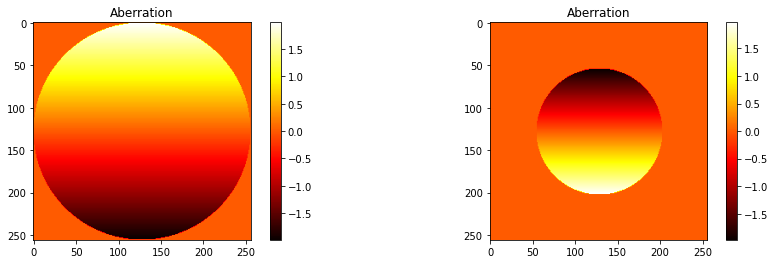

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1); plt.imshow(w, cmap="hot"); plt.title('Aberration'); plt.colorbar()
plt.subplot(1,2,2); plt.imshow(phase, cmap="hot"); plt.title('Aberration'); plt.colorbar()

50
50
50


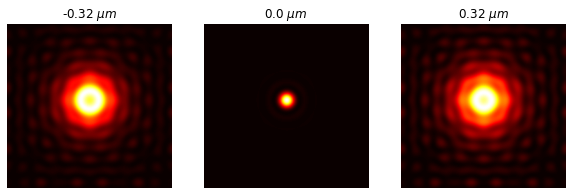

In [21]:
plt.figure(figsize=(10,10));
for i in range(3):
    plt.subplot(1,3,i+1);
    mid_plane = h1.shape[0]//2;
    print(mid_plane)
    plt.imshow(h1[(mid_plane-20)+i*20],cmap="hot");
    plt.title(f"{0.016*20*(i-1)} $\mu m$")
    plt.axis('OFF');

Visualize

(101, 256, 256)


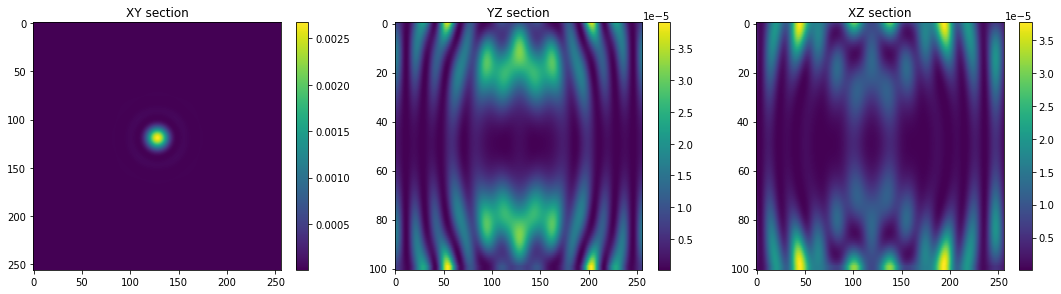

In [22]:
plt.figure(figsize=(15,4))
print(h1.shape)
N = h1.shape[0]
plt.subplot(131); plt.imshow(h1[N//2]); plt.title('XY section'); plt.colorbar()
plt.subplot(132); plt.imshow(h1[:,N//2,:]); plt.title('YZ section'); plt.colorbar()
ax = plt.gca()
ax.set_aspect(2.535)
plt.subplot(133); plt.imshow(h1[:,:,N//2]); plt.title('XZ section'); plt.colorbar()
ax = plt.gca()
ax.set_aspect(2.535)
plt.tight_layout()